In [ ]:
#TODO:
# Weighted covariance 

In [ ]:
# Datafetch
# !wget ftp://ftp.ncbi.nlm.nih.gov/geo/series/GSE129nnn/GSE129788/suppl/GSE129788_RAW.tar
# !tar -xvf GSE129788_RAW.tar
# !gunzip *.gz

# Accessions for raw datafetch:
# accessions = [
#     "SRR8895023",
#     "SRR8895024",
#     "SRR8895025",
#     "SRR8895026",
#     "SRR8895027",
#     "SRR8895028",
#     "SRR8895029",
#     "SRR8895030",
#     "SRR8895031",
#     "SRR8895032",
#     "SRR8895033",
#     "SRR8895034",
#     "SRR8895035",
#     "SRR8895036",
#     "SRR8895037",
#     "SRR8895038",
# ]


# Assembly is mostly GCF_000001635.20, except for last which is MM10? 
# Don't use 16

# age = [
#     'old',
#     'old',
#     'old',
#     'old',
#     'old',
#     'old',
#     'old',
#     'young',
#     'young',
#     'young',
#     'young',
#     'young',
#     'young',
#     'young',
#     'young',
#     'old', # weird assemblym mm10 for some reason?    
# ]

# Hooray for garbage that hasn't been maintained since the reagan administration

# for acc in accessions:
#     !./sratoolkit.2.10.8-ubuntu64/bin/prefetch {acc}


In [ ]:
# SRAs were moved to the folder 

# For shell background paralleleizaiton this will have to be a shell script:

# for acc in $(find ./aging_brain/SRR*/*.sra)
# do
#         echo $acc
#         echo $acc > $acc.log &
#         ./sratoolkit.2.10.8-ubuntu64/bin/fastq-dump --readids --dumpbase --split-files --clip $acc > $acc.log 2>&1 &
# done

In [ ]:
# !mkdir aging_brain
# !mv GSM37221* aging_brain
# !mv GSE129788_RAW.tar aging_brain/

In [ ]:
# import numpy as np
# import matplotlib.pyplot as plt
# import scanpy as sc



In [ ]:
# sample_locations = !ls ./aging_brain/GSM*

In [ ]:
# samples = []

# for sample_location in sample_locations:
#     samples.append(sc.read(sample_location))

In [ ]:
# samples = [s.T for s in samples]

In [ ]:
# Samples are already normalized so we will have to stack them unless I want to spend forever and a day downloading bullshit raw data

# samples

In [ ]:
# combined = np.vstack([s.X for s in samples])
# combined.shape

In [ ]:
# stacked = sc.AnnData(combined)
# stacked.var_names = samples[0].var_names
# stacked

In [ ]:
# filter_result = sc.pp.filter_genes_dispersion(  # select highly-variable genes
#     stacked.X, flavor='cell_ranger', n_top_genes=2000, log=True
# )
# filtered = stacked[:, filter_result.gene_subset]     # subset the genes


In [ ]:
# filtered

In [ ]:
# We have to set up young vs old annotation:

# young_mask = np.zeros(37069,dtype=bool)
# old_mask = np.zeros(37069,dtype=bool)

# young_samples = np.sum([s.shape[0] for s in samples[:8]])
# young_mask[:young_samples] = True

# old_samples = np.sum([s.shape[0] for s in samples[8:]])
# old_mask[young_samples:] = True

In [ ]:
# total_samples = stacked.shape[0]
# batch_encoding = np.zeros((total_samples,len(samples)),dtype=bool)
# batch_labels = np.zeros(total_samples)

# for i,sample in enumerate(samples):
#     current_total = np.sum(batch_encoding)
#     batch_encoding[current_total:current_total+sample.shape[0],i] = True
#     batch_labels[current_total:current_total+sample.shape[0]] = i
    
# np.savetxt("aging_batch_encoding.tsv",batch_encoding,)

In [ ]:
# batch_encoding.shape

In [ ]:
# young_samples+old_samples

In [ ]:
# old_samples

In [ ]:
# young = filtered[young_mask].copy()
# old = filtered[old_mask].copy()

In [ ]:
# import pickle

# pickle.dump(young,open("aging_brain_young.pickle",mode='bw'))
# pickle.dump(old,open("aging_brain_old.pickle",mode='bw'))
# pickle.dump(filtered,open("aging_brain_filtered.pickle",mode='bw'))


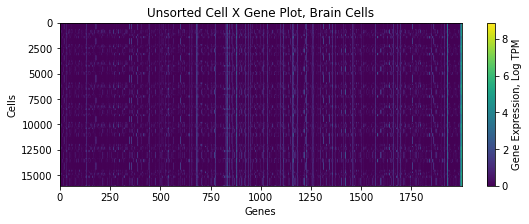

In [10]:
# from scipy.cluster.hierarchy import linkage,dendrogram

# sample_agglomeration = dendrogram(linkage(young.X, metric='cosine', method='average'), no_plot=True)['leaves']
# feature_agglomeration = dendrogram(linkage(young.X.T, metric='cosine', method='average'), no_plot=True)['leaves']

plt.figure(figsize=(9,3))
plt.title("Unsorted Cell X Gene Plot, Brain Cells")
plt.imshow(young.X,aspect='auto')
plt.colorbar(label="Gene Expression, Log TPM")
plt.ylabel("Cells")
plt.xlabel("Genes")
plt.show()

         Falling back to preprocessing with `sc.pp.pca` and default params.


/Users/bbrener1/miniconda3/lib/python3.7/site-packages/numba/typed_passes.py:293: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "../../../miniconda3/lib/python3.7/site-packages/umap/nndescent.py", line 47:
    @numba.njit(parallel=True)
    def nn_descent(
    ^

  state.func_ir.loc))


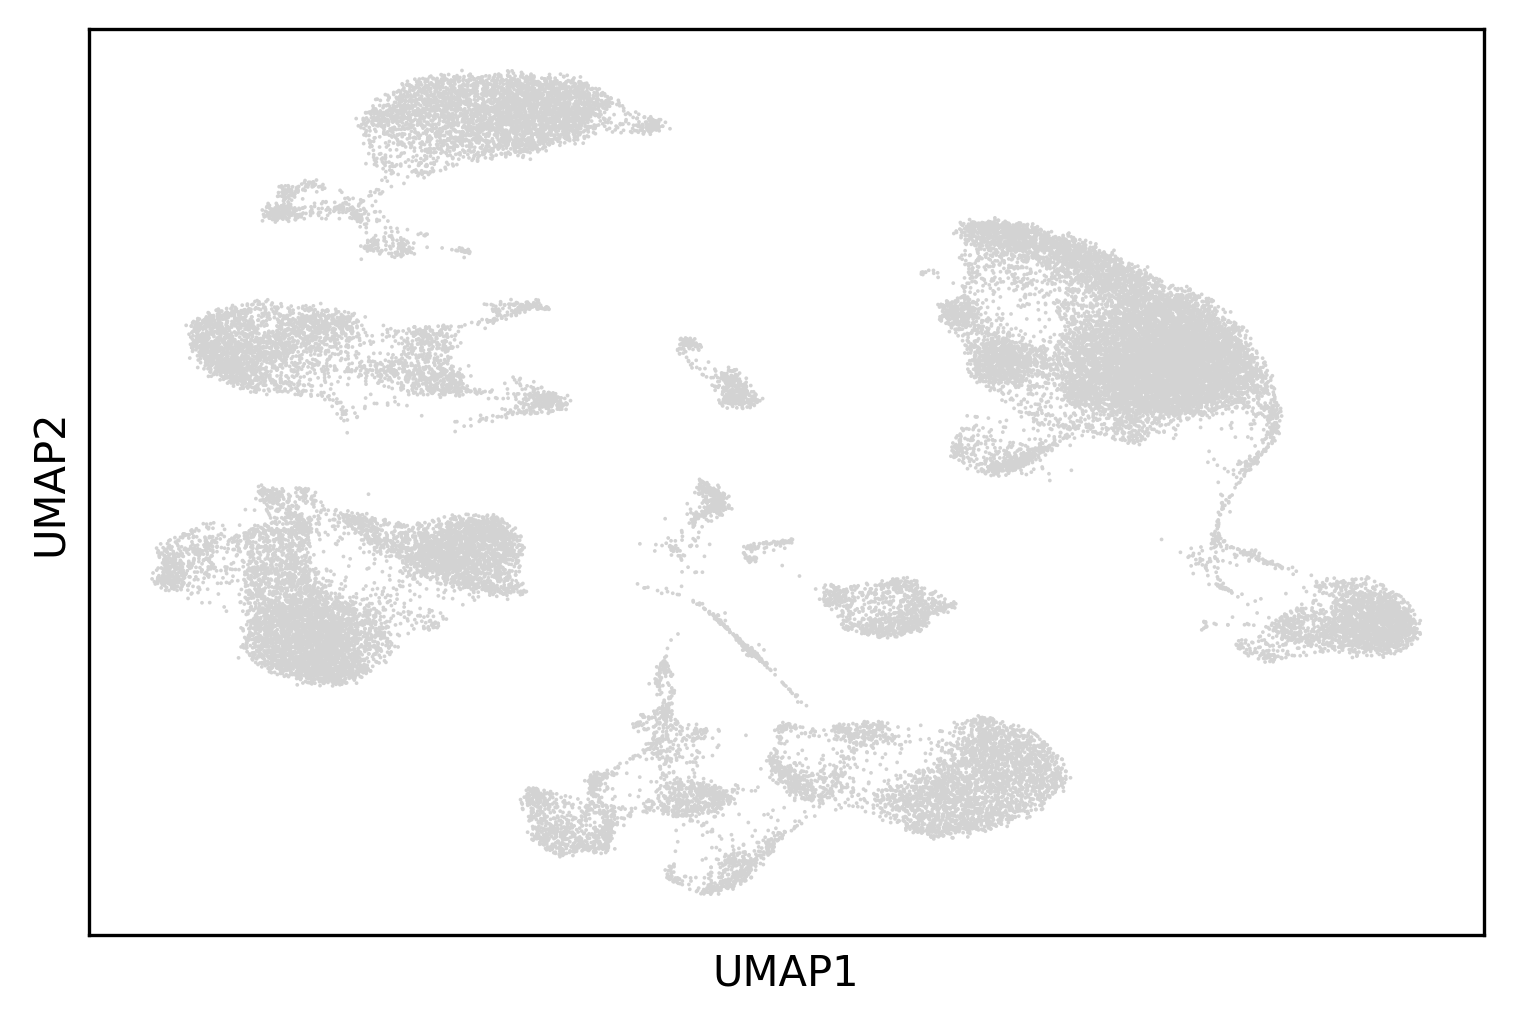

/Users/bbrener1/miniconda3/lib/python3.7/site-packages/numba/typed_passes.py:293: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "../../../miniconda3/lib/python3.7/site-packages/umap/nndescent.py", line 47:
    @numba.njit(parallel=True)
    def nn_descent(
    ^

  state.func_ir.loc))


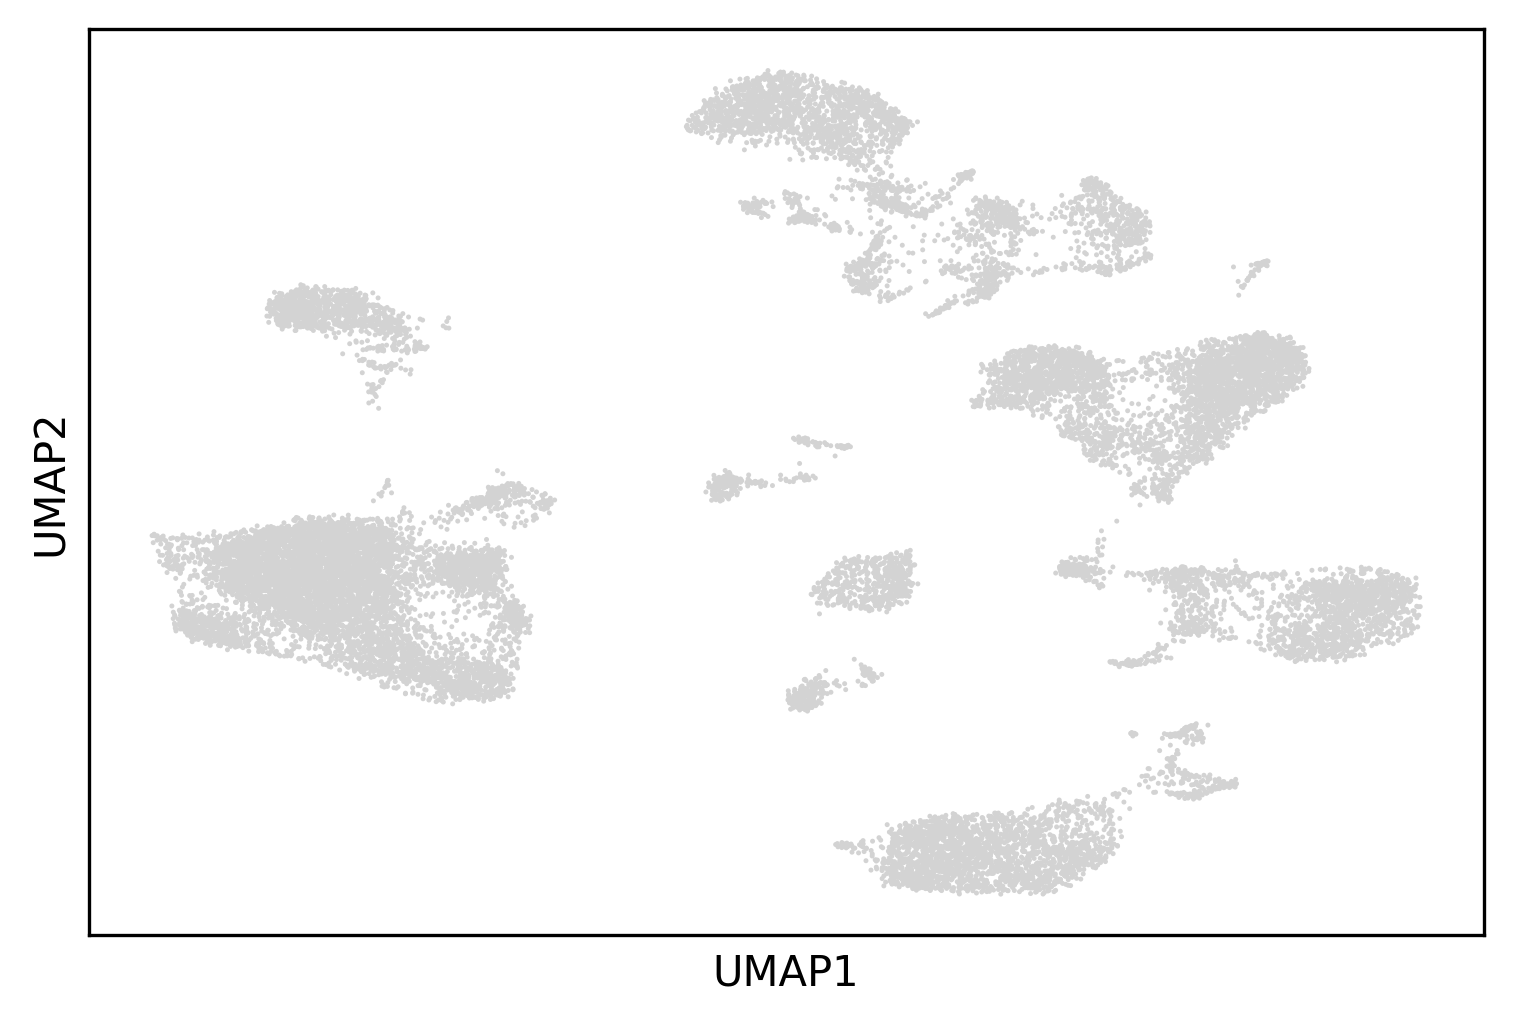

In [15]:
# Basic scanpy processing:

sc.pp.neighbors(filtered)
sc.tl.umap(filtered)
sc.pl.umap(filtered)

# sc.pp.neighbors(young)
# sc.tl.umap(young)
# sc.pl.umap(young)

# sc.pp.neighbors(old)
# sc.tl.umap(old)
# sc.pl.umap(old)


# sc.tl.louvain(young,resolution=3)
# sc.pl.umap(young,color='louvain')


In [ ]:
# r = np.arange(batch_encoding.shape[1])
# batch_labels = np.array([r[m][0] for m in batch_encoding])

# plt.figure(figsize=((10,10)))
# plt.scatter(*filtered.obsm['X_umap'].T,s=1,c=batch_labels,cmap='rainbow')
# plt.show()



# plt.figure(figsize=((10,10)))
# plt.scatter(*filtered.obsm['X_umap'].T,s=1,c=young_mask,alpha=.3,cmap='bwr')
# plt.show()


In [ ]:
# import sys
# # sys.path.append('/localscratch/bbrener1/rusty_forest_v3/src')
# sys.path.append('../src')
# import tree_reader as tr 
# import lumberjack

# forest = lumberjack.fit(
#     young.X,
# #     old.X,
#     header=filtered.var_names,
#     trees=300,
#     braids=3,
#     ifs=1000,
#     ofs=1000,
#     ss=500,
#     depth=10,
#     leaves=100,
#     sfr=.5
# )

# forest.set_cache(True)
# forest.backup("scanpy_cmp_aging_brain_trim_prediction")

# with open("scanpy_cmp_aging_brain_trim_prediction", mode='bw') as f:
#     pickle.dump(forest.old_predictions, f)


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scanpy as sc

import pickle 

young = pickle.load(open("aging_brain_young.pickle",mode='rb'))
old = pickle.load(open("aging_brain_old.pickle",mode='rb'))
filtered = pickle.load(open("aging_brain_filtered.pickle",mode='rb'))

batch_encoding = np.loadtxt('aging_batch_encoding.tsv')
batch_encoding = batch_encoding.astype(dtype=bool)

young_mask = np.zeros(37069,dtype=bool)
old_mask = np.zeros(37069,dtype=bool)

young_mask[:young.shape[0]] = True
old_mask[young.shape[0]:] = True

In [9]:
import sys
# sys.path.append('/localscratch/bbrener1/rusty_forest_v3/src')
sys.path.append('../src')
import tree_reader as tr 
import lumberjack

forest = tr.Forest.reconstitute('scanpy_cmp_aging_brain_trim_prediction')
forest.arguments

# old_forest = tr.Forest.reconstitute('scanpy_cmp_aging_brain_old')
# old_forest.arguments

['/Users/bbrener1/haxx/rusty_lumberjack_v3/target/release/rusty_lumberjack_v3',
 '-ic',
 '/var/folders/_k/81hqlgss0tbf2l0t7wm4t_200000gn/T/tmpt0p_6i07/input.counts',
 '-oc',
 '/var/folders/_k/81hqlgss0tbf2l0t7wm4t_200000gn/T/tmpt0p_6i07/output.counts',
 '-o',
 '/var/folders/_k/81hqlgss0tbf2l0t7wm4t_200000gn/T/tmpt0p_6i07/tmp',
 '-auto',
 '-ifh',
 '/var/folders/_k/81hqlgss0tbf2l0t7wm4t_200000gn/T/tmpt0p_6i07/tmp.ifh',
 '-ofh',
 '/var/folders/_k/81hqlgss0tbf2l0t7wm4t_200000gn/T/tmpt0p_6i07/tmp.ofh',
 '-trees',
 '300',
 '-braids',
 '3',
 '-ifs',
 '1000',
 '-ofs',
 '1000',
 '-ss',
 '200',
 '-depth',
 '8',
 '-leaves',
 '100',
 '-sfr',
 '0.5']

In [ ]:
# First we must interpret split clusters, since this will play a role in establishing the existence thereof
# (I realize the paradox of creating a thing I have not proven exists, but hey, this isn't the philosophy department)

# forest.reset_split_clusters()
# forest.interpret_splits(depth=6,k=100,relatives=True,pca=100,mode='additive_mean',metric='cosine')
# forest.interpret_splits(depth=8,k=100,relatives=True,pca=100,mode='additive_mean',metric='cosine')



In [ ]:
# Here we plot various feature representations of nodes. 
# This generates a set of figures demonstrating the existence of node clusters

# from sklearn.decomposition import PCA

# sample_encoding = forest.node_representation(forest.nodes(depth=5),mode='sample')
# reduced_sample = PCA(n_components=100).fit_transform(sample_encoding.T)
# reduced_node = PCA(n_components=100).fit_transform(sample_encoding)

# print(sample_encoding.shape)
# print(reduced_sample.shape)
# print(reduced_feature.shape)

# from scipy.cluster.hierarchy import linkage,dendrogram

# sample_agglomeration = dendrogram(linkage(reduced_sample, metric='cosine', method='average'), no_plot=True)['leaves']
# node_agglomeration = dendrogram(linkage(reduced_feature, metric='cosine', method='average'), no_plot=True)['leaves']

# plt.figure()
# plt.title("Figure 1: Sample Presence in Node (Two-Way Agglomerated)")
# plt.imshow(sample_encoding[node_agglomeration].T[sample_agglomeration].T,cmap='binary',interpolation='none')
# plt.xlabel("Samples")
# plt.ylabel("Nodes")
# plt.colorbar()
# plt.tight_layout()
# plt.show()

# node_cluster_sort = np.argsort([n.split_cluster for n in forest.nodes(depth=5)])

# plt.figure()
# plt.title("Figure S1: Sample Presence in Node (Clustered)")
# plt.imshow(sample_encoding[node_cluster_sort].T[sample_agglomeration].T,cmap='binary',interpolation='none')
# plt.xlabel("Samples")
# plt.ylabel("Nodes")
# plt.colorbar()
# plt.tight_layout()
# plt.show()

# feature_encoding = forest.node_representation(forest.nodes(depth=5),mode='additive_mean')
# reduced_feature = PCA(n_components=100).fit_transform(feature_encoding.T)
# reduced_node = PCA(n_components=100).fit_transform(feature_encoding)

# feature_agglomeration = dendrogram(linkage(reduced_feature, metric='cosine', method='average'), no_plot=True)['leaves']

plt.figure()
plt.title("Figure S2: Target Gain in Node (Clustered)")
plt.imshow(feature_encoding[node_cluster_sort].T[feature_agglomeration].T,cmap='bwr',interpolation='none',aspect='auto')
plt.xlabel("Features")
plt.ylabel("Nodes")
plt.colorbar(label="Parent Target Mean - Node Target Mean")
plt.tight_layout()
plt.show()


In [ ]:
transition_matrix = forest.split_cluster_transition_matrix()

transition_agglomeration = dendrogram(linkage(transition_matrix.T, metric='cosine', method='average'), no_plot=True)['leaves']


plt.figure()
plt.title("Fig S3: Frequency of Transition Between Cluster Nodes")
plt.imshow(transition_matrix,cmap='binary')
plt.ylabel("Origin")
plt.xlabel("Destination")
plt.colorbar(label="Number of transitions")
plt.show()

In [ ]:
# Now we would like to demonstrate the existence of correlations that are unusual within the node clusters.

global_correlations = forest.global_correlations()

for cluster in forest.split_clusters:
    print("#############################")
    print(cluster.id)
    print("#############################")

    local_correlations = cluster.local_correlations()
    most_local = cluster.most_local_correlations()
    for (f1,f2) in most_local:
        print((forest.output_features[f1],forest.output_features[f2]))
        print(f"Global:{global_correlations[f1,f2]}")
        print(f"Local:{local_correlations[f1,f2]}")


In [ ]:
# Now we can demonstrate significant local behavior reversals. 
# Ex Apod vs Ptgds in cluster 17.
# Global: .63 Pearson
# Local: -.37 Pearson

apod_index = list(forest.output_features).index("Apod")
ptgds_index = list(forest.output_features).index("Ptgds")

apod_values = forest.output[:,apod_index]
ptgds_values = forest.output[:,ptgds_index]

factor_17 = forest.factor_matrix()[:,17]
mask_17 = np.abs(factor_17) > .1

from scipy.stats import linregress

global_slope,global_intercept,_,_,_ = linregress(apod_values,ptgds_values)
local_slope,local_intercept,_,_,_ = linregress(apod_values[mask_17],ptgds_values[mask_17])

plt.figure()
plt.title("Figure 4A: Apod vs. Ptgds Expression (Global)")
plt.scatter(apod_values,ptgds_values,s=1,alpha=.3,label="Raw Values")
plt.xlabel("Apod (Centered Log TPM)")
plt.ylabel("Ptgds (Centered Log TPM))")
plt.plot(np.arange(7), global_intercept + (np.arange(7) * global_slope),c='red',label="Linear Fit")
plt.legend()
plt.show()

plt.figure()
plt.title("Figure 4B: Apod vs. Ptgds Expression (Factor 17 +/- Only)")
plt.scatter(apod_values[mask_17],ptgds_values[mask_17],s=1,alpha=.3,label="Raw Values")
plt.xlabel("Apod (Centered Log TPM)")
plt.ylabel("Ptgds (Centered Log TPM))")
plt.plot(np.arange(7), local_intercept + (np.arange(7) * local_slope),c='red',label="Linear Fit")
plt.legend()
plt.show()

In [ ]:
# forest.most_likely_tree(depth=6)
forest.maximum_spanning_tree(mode='samples',depth=8)

In [ ]:
forest.tsne_coordinates = young.obsm['X_umap']
# forest.tsne()
forest.html_tree_summary(n=10)

In [ ]:
forest.reset_sample_clusters()
forest.cluster_samples_encoding(k=100,pca=100,depth=8,metric='cosine')
# forest.cluster_samples_simple(pca=100,sub=.8,k=20,metric='cosine',verbose=True)
forest.plot_sample_clusters()

In [ ]:
factors = forest.factor_matrix()
factors

In [ ]:
# from scipy.cluster.hierarchy import dendrogram,linkage

# factor_sort = np.array(dendrogram(linkage(np.abs(factors.T[1:]),metric='correlation',method='average'),no_plot=True)['leaves']) + 1 
# sample_forest_sort = np.argsort(forest.sample_labels)
# sample_agg_sort = dendrogram(linkage(np.abs(factors.T[1:].T),metric='cosine',method='average'),no_plot=True)['leaves']

# plt.figure()
# plt.imshow(factors[sample_forest_sort].T[factor_sort].T,aspect='auto',interpolation='none',cmap="seismic",vmin=-1,vmax=1)
# plt.colorbar()
# plt.show()http://localhost:8888/notebooks/scanpy_aging_brain_2.ipynb#

# plt.figure()
# plt.imshow(factors[sample_agg_sort].T[factor_sort].T,aspect='auto',interpolation='none',cmap="seismic",vmin=-1,vmax=1)
# plt.colorbar()
# plt.show()

In [ ]:
# young.shape

In [ ]:
forest.sample_clusters[0].id

10265095.0
5209224.5
Remaining variance:0.507469654083252


In [ ]:

# forest.old_predictions = forest.predict(old.X)
# forest.young_predicitons = forest.predict(young.X)
# forest.young_predicitons.node_sample_encoding()
# forest.old_predictions.node_sample_encoding()

# entropy = forest.young_predicitons.compare_factors(forest.old_predictions)
# entropy_sort = np.argsort(entropy)
# print(list(zip(entropy_sort,np.array(entropy)[entropy_sort])))

# old_residuals = np.power(old.X - np.mean(old.X,axis=0),2)
# np.arange(2000)[np.sum(old_residuals,axis=0) <= 0]

# forest.output_features[471]

# old_features,old_samples = forest.old_predictions.prediction_report(mode='mean')
# young_features,young_samples = forest.young_predicitons.prediction_report(mode='mean')

# plt.figure()
# plt.scatter(*young.obsm["X_umap"].T,c=pca_recovered_fraction_per_sample,s=3,alpha=.4)
# plt.colorbar()
# plt.show()

# plt.figure()
# plt.scatter(*young.obsm["X_umap"].T,c=young_samples,s=3,alpha=.4)
# plt.colorbar()
# plt.show()

# plt.figure()
# plt.scatter(*filtered.obsm["X_umap"][young_mask].T,c=young_samples,s=3,alpha=.4)
# plt.colorbar()
# plt.show()

# plt.figure()
# plt.scatter(*filtered.obsm["X_umap"][old_mask].T,c=old_samples,s=3,alpha=.4)
# plt.colorbar()
# plt.show()


# plt.figure()
# plt.hist(young_features,bins=np.arange(0,1,.05),log=True)
# plt.show()

# plt.figure()
# plt.hist(old_features,bins=np.arange(0,1,.05),log=True)
# plt.show()

deltas,mismatch = forest.young_predicitons.compare_predictions(forest.old_predictions,bootstraps=1000,interval=.99999)


# feature_index = list(forest.output_features).index("Snca")

# print(old_features[feature_index])
# print(young_features[feature_index])

# delta_sort = np.argsort(deltas)

# print(list(delta_sort).index(feature_index))

# plt.figure()
# plt.hist(deltas,bins=np.arange(0,1,.02))

In [7]:
# First we would like to run a few brief comparisons to PCA

# PCA recovers this fraction using the same number of "Factors"
from sklearn.decomposition import PCA

model = PCA(n_components=30).fit(young.X)
transformed = model.transform(young.X)
recovered = model.inverse_transform(transformed)

centered = young.X - np.mean(young.X,axis=0)
transformed_residual = np.power(centered,2)

recovered_residual = np.power(young.X - recovered,2)

pca_recovered_per_sample = np.sum(recovered_residual,axis=1)
pca_recovered_fraction_per_sample = np.sum(recovered_residual,axis=1) / np.sum(transformed_residual,axis=1)
print(np.sum(transformed_residual))
print(np.sum(recovered_residual))

print(f"Remaining variance:{(np.sum(recovered_residual) / np.sum(transformed_residual))}")

10265095.0
5209436.0
Remaining variance:0.5074902772903442


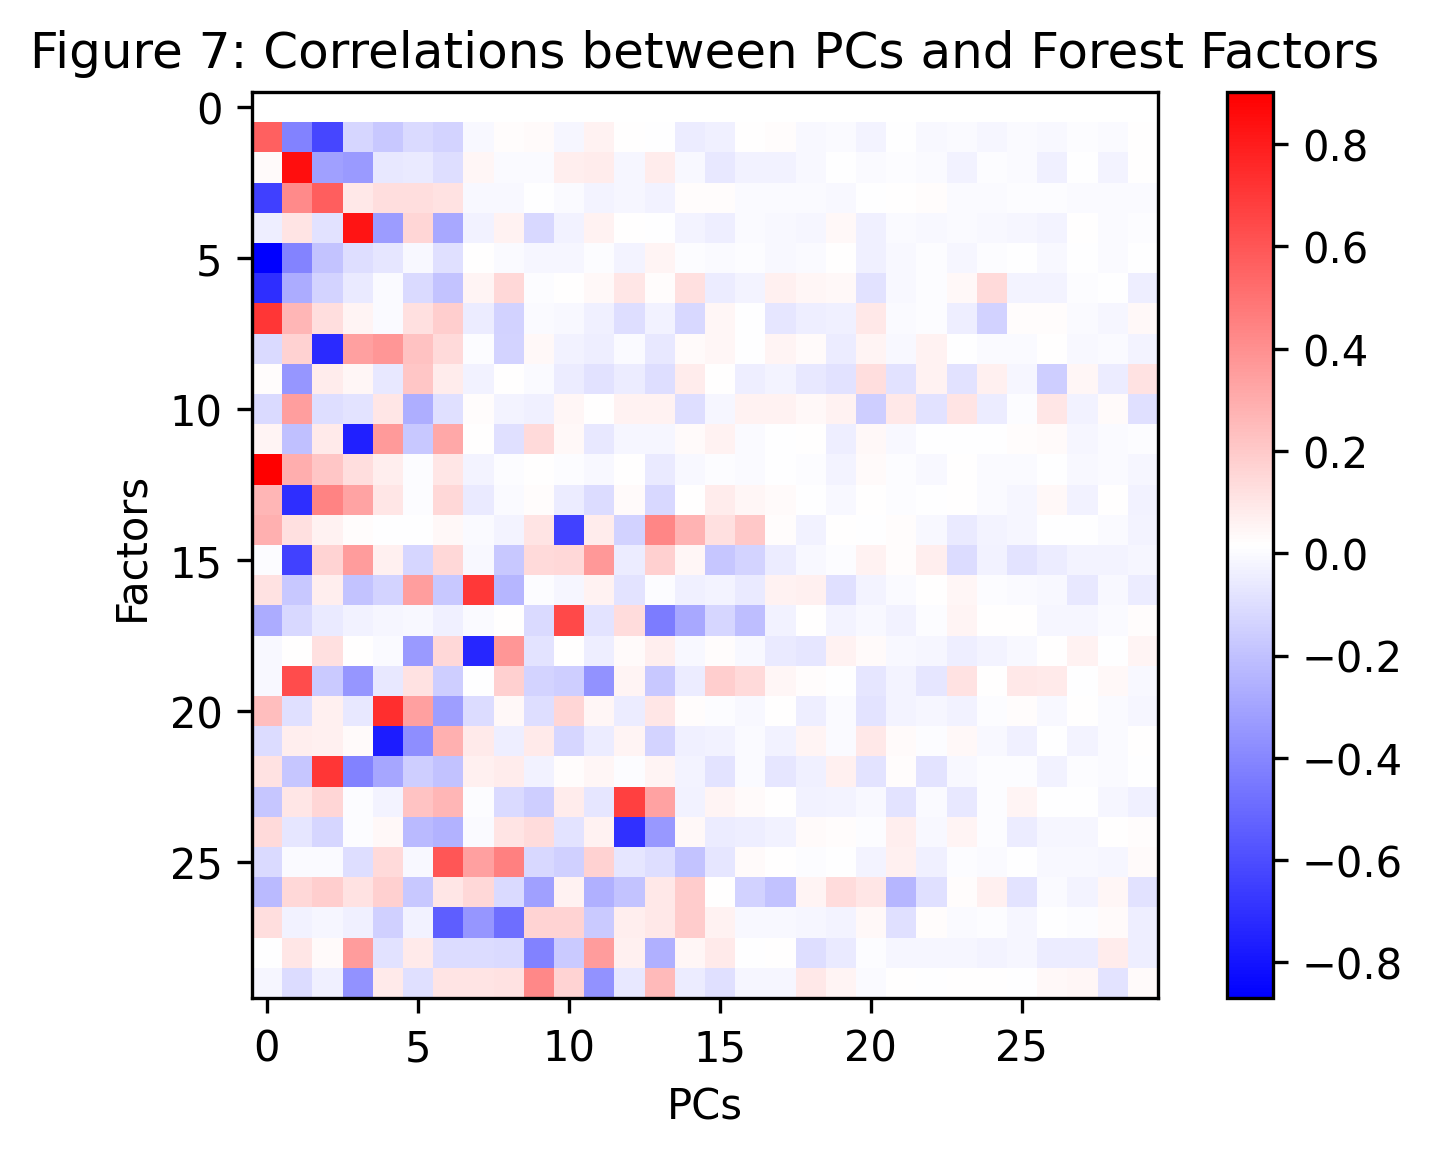

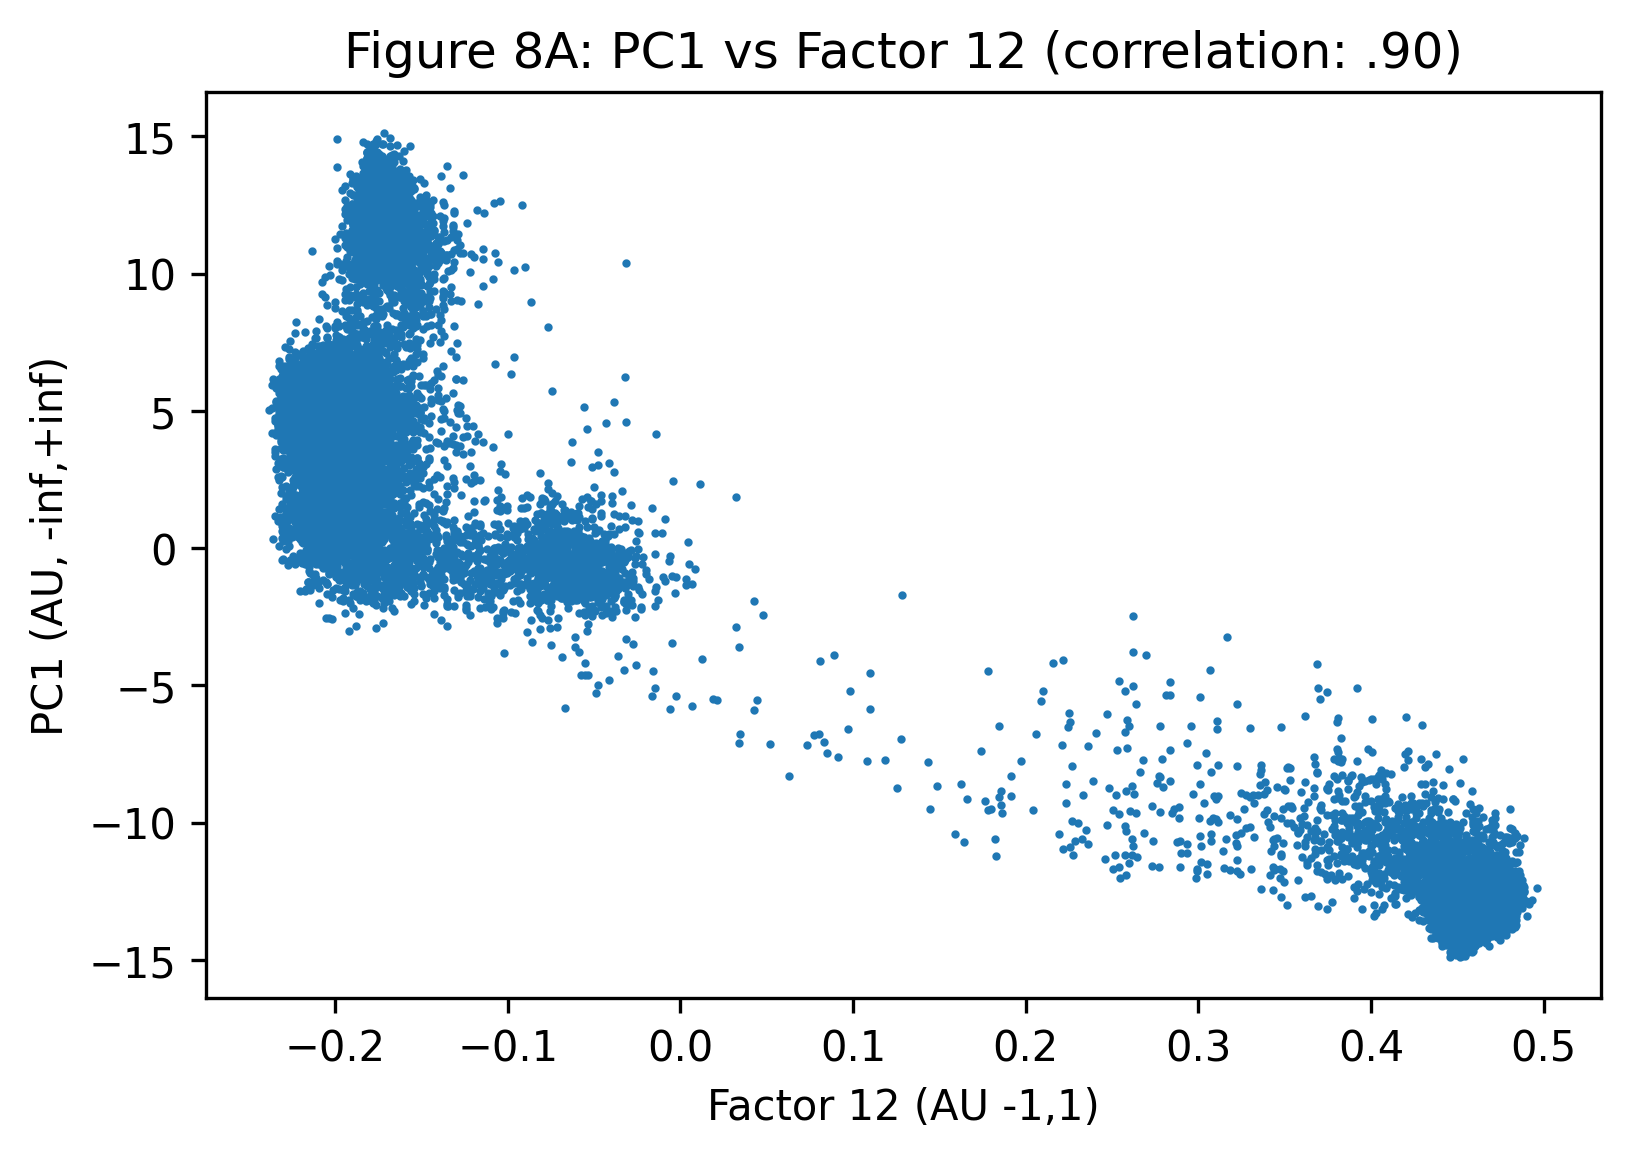

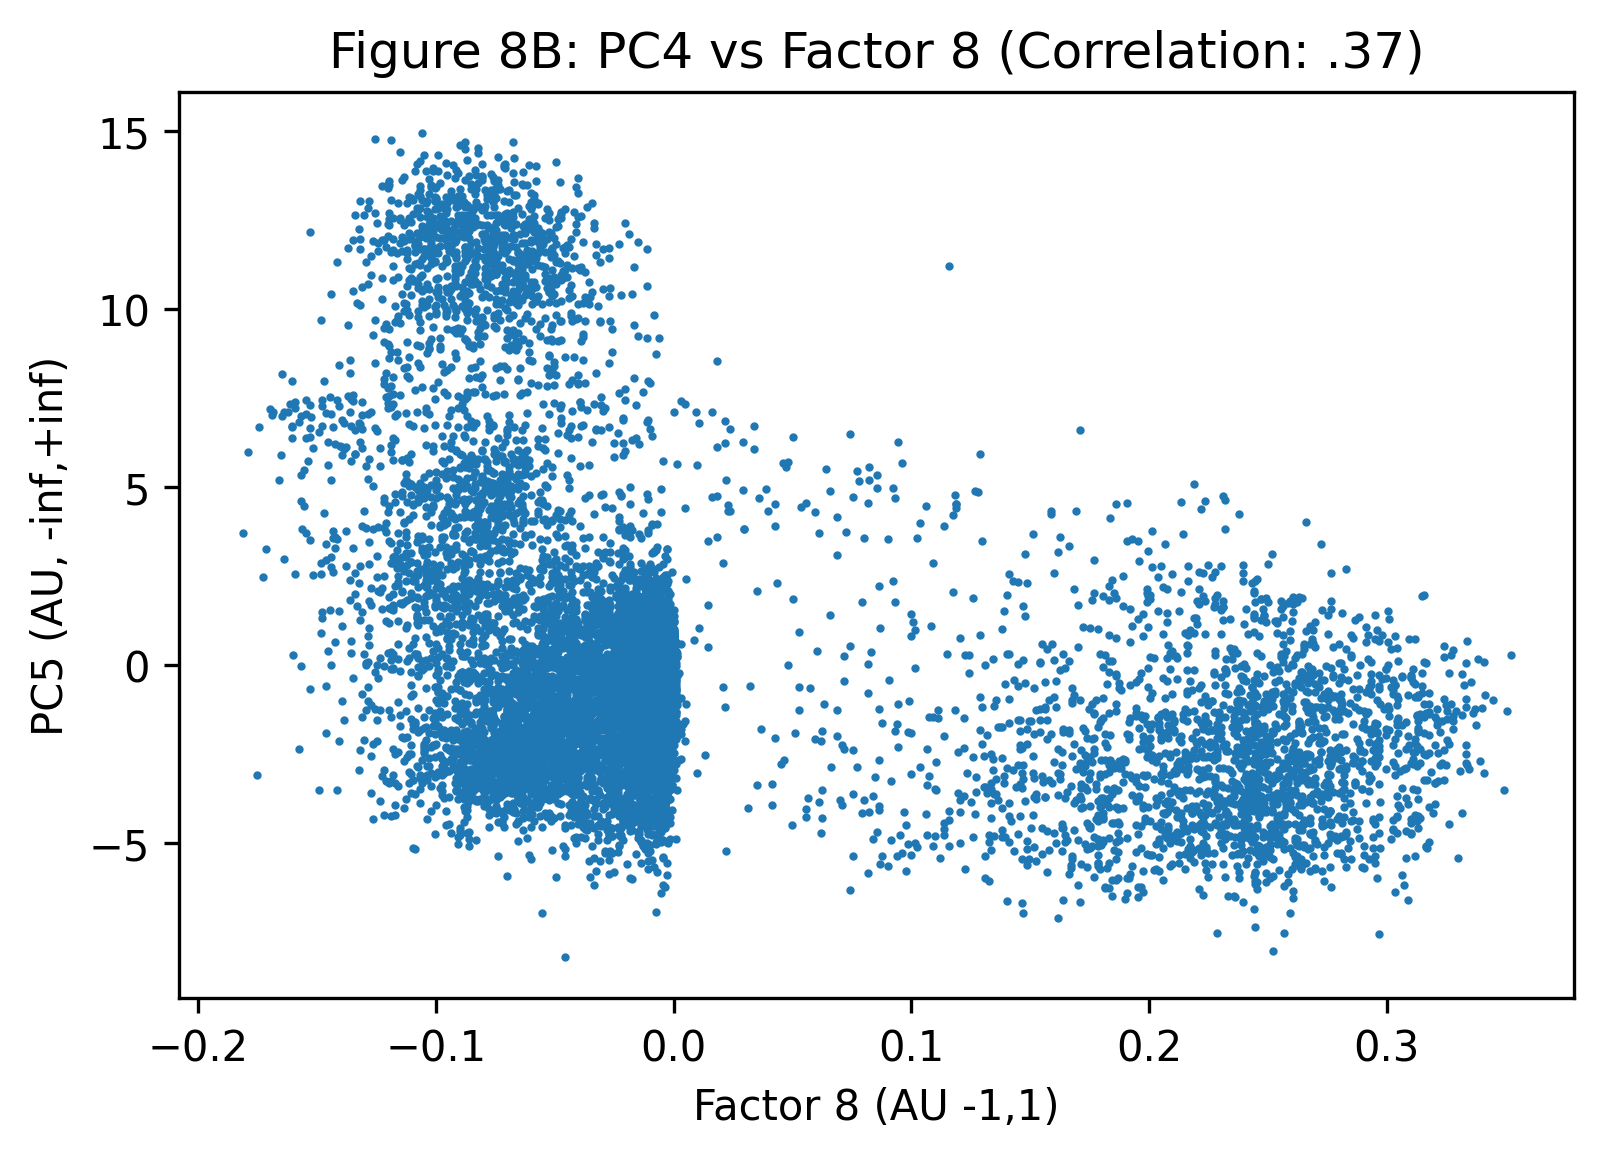

In [19]:
# Now we would like to compare the factors to PCs
# We will use c-dist
from scipy.spatial.distance import cdist

# young_factors = forest.factor_matrix()

# comparison = cdist(young_factors.T,transformed.T,metric='correlation') - 1

plt.figure()
plt.title("Figure 7: Correlations between PCs and Forest Factors")
plt.imshow(comparison,cmap='bwr')
plt.colorbar()
plt.ylabel("Factors")
plt.xlabel("PCs")
plt.show()

# comparison[12,0]
# comparison[8,4]

plt.figure()
plt.title("Figure 8A: PC1 vs Factor 12 (correlation: .90)")
plt.scatter(young_factors[:,12],transformed[:,0],s=1)
plt.xlabel("Factor 12 (AU -1,1)")
plt.ylabel("PC1 (AU, -inf,+inf)")
plt.show()

plt.figure()
plt.title("Figure 8B: PC4 vs Factor 8 (Correlation: .37)")
plt.scatter(young_factors[:,8],transformed[:,4],s=1)
plt.xlabel("Factor 8 (AU -1,1)")
plt.ylabel("PC5 (AU, -inf,+inf)")
plt.show()


In [ ]:
# young_mse = forest.young_predicitons.feature_mse()
# old_mse = forest.old_predictions.feature_mse()
# mse_jackknife = forest.young_predicitons.jackknife_feature_mse_variance()

# jackknife_sort = np.argsort(mse_jackknife)
# top_jackknife = jackknife_sort[-100:]
delta_sort = np.argsort(deltas)
top_deltas = delta_sort[-100:]

# np.sum(mismatch)

plt.figure(figsize=(5,5))
plt.title("Figure 5: MSE Of Predictions in Young vs Old Samples")
# plt.scatter(np.log(young_mse),np.log(old_mse),s=1)
plt.scatter(young_mse,old_mse,s=1)
plt.xlabel("Young (MSE Log TPM Expression)")
plt.ylabel("Old (MSE Log TPM Expression)")
plt.plot([0,1],[0,1],c='red')
for i in top_deltas:
    var = np.sqrt(mse_jackknife[i])
    segment = var/np.sqrt(2)
    x,y = (young_mse[i],old_mse[i])
    plt.plot([x+segment,x-segment],[y,y],linewidth=1)
#     whisker_p,whisker_m = x+segment,x-segment
#     plt.plot(np.log([whisker_p,whisker_m]),np.log([y,y]),linewidth=1)
plt.show()

In [ ]:
reverse_top = delta_sort[-100:]
reverse_top = np.array(list(reversed(reverse_top)))
top_deltas = forest.output_features[reverse_top]
delta_mse = deltas[reverse_top]

for f,d in zip(top_deltas,delta_mse):
    print(f"{f}: \t{np.around(d,decimals=3)}")

In [ ]:
# We observe large MSE delta for SNCA 
# Let's plot its behavior VS KLK6 in the relevant cluster (17)

# First we need to predict which samples in the old set will fall in cluster 17
young_factors = forest.factor_matrix()
old_factors = forest.old_predictions.factor_matrix()

mask_17 = np.abs(young_factors[:,17]) > .1
mask_17_old = np.abs(old_factors[:,17]) > .1

print(young_factors.shape)
print(old_factors.shape)

snca_index = list(forest.output_features).index("Snca")
klk6_index = list(forest.output_features).index("Klk6")

snca_values_young = forest.output[:,snca_index][mask_17]
klk6_values_young = forest.output[:,klk6_index][mask_17]

snca_values_old = old.X[:,snca_index][mask_17_old]
klk6_values_old = old.X[:,klk6_index][mask_17_old]

from scipy.stats import linregress

young_slope,young_intercept,_,_,_ = linregress(klk6_values_young,snca_values_young)
old_slope,old_intercept,_,_,_ = linregress(klk6_values_old,snca_values_old)

plt.figure()
plt.title("Figure 6A: Klk6 vs SNCA (Young)")
plt.scatter(klk6_values_young,snca_values_young,s=1,label="Raw Values")
plt.plot(np.arange(6),(np.arange(6)*young_slope)+young_intercept,c='red',label='Linear Fit')
plt.xlabel("Klk6")
plt.ylabel("SNCA")
plt.legend()
plt.show()

plt.figure()
plt.title("Figure 6B: Klk6 vs SNCA (Old)")
plt.scatter(klk6_values_old,snca_values_old,s=1,label="Raw Values")
plt.plot(np.arange(6),(np.arange(6)*old_slope)+old_intercept,c='red',label='Linear Fit')
plt.xlabel("Klk6")
plt.ylabel("SNCA")
plt.legend()
plt.show()

In [ ]:
import sys
sys.path.append('../gsea/src')

from gsea import gsea,readgenesets

In [ ]:
background = [g.upper() for g in forest.input_features]
background

In [ ]:
kegg_sets = readgenesets("../gsea/data/kegg_allpathways.txt")
extant = []
not_found = []
for g in background:
    for k in kegg_sets:
        if g in kegg_sets[k]:
            extant.append(g)
            break
    if g not in extant:
        not_found.append(g)
print(len(extant))
extant

In [ ]:
from colorama import Fore, Back, Style 

for cluster in forest.split_clusters[1:]:
    changed_vs_sister,fold_vs_sister = cluster.logistic_sister()
    test_up = [g.upper() for g in changed_vs_sister[-50:]]
#     test_down = [g.upper() for g in changed_vs_sister[:50]]
    enrichment = gsea(test_up,background,"../gsea/data/kegg_allpathways.txt")
    sorted_enrichment = [(e,enrichment[e]) for e in sorted(enrichment,key=lambda x: enrichment[x][5])]
    sorted_enrichment = [(e,s) for (e,s) in sorted_enrichment if s[0] > 0]
    sorted_enrichment = [(e,s) for (e,s) in sorted_enrichment if s[5] < .05]
    print("#######################")
    print(f"Cluster {cluster.id}")
    print("#######################")
    print("\n".join([str(Fore.RED + e) + str(Fore.BLACK + str(s)) for (e,s) in sorted_enrichment]))

In [ ]:
plt.figure()
plt.scatter(*forest.tsne_coordinates.T,s=1,c=forest.output[:,1571])

In [ ]:
list(forest.output_features).index('Rps23')

In [ ]:
plt.figure()
plt.scatter(*young.obsm['X_umap'].T,s=1,c=forest.output[:,1571])

In [ ]:
# Here we train a leave-one-out forest

cv_forest = lumberjack.fit(
    young.X[:-2648],
    header=filtered.var_names,
    trees=300,
    braids=3,
    ifs=700,
    ofs=700,
    ss=200,
    depth=7,
    leaves=100,
    sfr=.5
)

In [ ]:
# cv_forest.set_cache(True)
# cv_forest.backup("scanpy_aging_brain_cv_forest")

In [ ]:
cv_forest = tr.Forest.reconstitute('scanpy_aging_brain_cv_forest')

In [ ]:
cv_forest.reset_split_clusters()
cv_forest.interpret_splits(sub=.8,k=100,pca=100,depth=6,mode='additive_mean',intercon=3,cycles=3,relatives=True)
# print(len(cv_forest.split_clusters))

In [ ]:
cv_prediction = cv_forest.predict_matrix(young.X[-2648:])

In [5]:
from sklearn.decomposition import PCA

target = young.X[-2648:]

model = PCA(n_components=10).fit(target)
recovery = model.inverse_transform(model.transform(target))

deviation = np.power(target - np.mean(target,axis=0),2)
print(f"Observed deviation {np.sum(deviation)}")
recovered_deviation = np.power(recovery - np.mean(recovery,axis=0),2)
print(f"Recovered deviation {np.sum(recovered_deviation)}")
recovery_error = np.power(target - recovery,2)
print(f"Recovery error {np.sum(recovery_error)}")


Observed deviation 1625741.375
Recovered deviation 707894.5
Recovery error 917846.3125


In [ ]:
forest_error = np.power(young.X[-2648:] - cv_prediction,2)
print(f"Forest error:{np.sum(forest_error)}")

In [ ]:
plt.figure()
plt.imshow(cv_prediction,aspect='auto',interpolation='none')
plt.show()
plt.figure()
plt.imshow(young.X[-2648:],aspect='auto',interpolation='none')
plt.show()

In [ ]:
predicted_encoding = cv_forest.predict_node_sample_encoding(young.X[-2648:])

In [ ]:
cv_forest.most_likely_tree(depth=6)

In [ ]:
target = young.X[-2648:]

import warnings

with warnings.catch_warnings():
    warnings.simplefilter("ignore")

    for cluster in cv_forest.split_clusters[1:]:
        parent_cluster = cluster.parent_cluster()
        print(f"Cluster {cluster.id}")
        print(f"Parent: {parent_cluster.id}")
        reg,features = cluster.regression()
        parent_weights = np.abs(old_factors[:,parent_cluster.id])
        print(f"Local Old:{Fore.RED}{reg.score(old.X.T[features].T,old.X,sample_weight=parent_weights)}")
        print(f"Global Old:{Fore.BLUE}{reg.score(old.X.T[features].T,old.X)}")    
        parent_weights = np.abs(young_factors[:,parent_cluster.id])
        print(f"Local Young:{Fore.RED}{reg.score(young.X.T[features].T,young.X,sample_weight=parent_weights)}")
        print(f"Global Young:{Fore.BLUE}{reg.score(young.X.T[features].T,young.X)}")    
                 

In [ ]:
forest.reset_sample_clusters()

In [ ]:
from colorama import Fore, Back, Style 

import warnings

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    g_o = []
    l_o = []
    g_y = []
    l_y = []
    e_o = []
    e_y = []
    for cluster in forest.split_clusters[1:]:
        parent_cluster = cluster.parent_cluster()
        print("########################")
        print(f"Cluster {cluster.id}")
        print(f"Parent: {parent_cluster.id}")
        p_y,n_y,a_y = cluster.error_ratio()
        e_y.append((p_y+n_y)/a_y)
        p_o,n_o,a_o = cluster.error_ratio(sample_matrix=old.X,scores=old_factors[:,cluster.id])
        e_o.append((p_o+n_o)/a_o)
        ff,f_r,r_r = cluster.regression()
#         weights = np.abs(old_factors[:,parent_cluster.id])
        weights = np.abs(old_factors[:,cluster.id])
#         old_intermediate = f_r.predict(old.X).reshape(-1, 1)
        old_intermediate = old.X.T[ff].T
        global_old = r_r.score(old_intermediate,old.X)
        local_old = r_r.score(old_intermediate,old.X,sample_weight=weights)
        g_o.append(global_old)
        l_o.append(local_old)
        print(f"Global Old:{Fore.RED}{global_old}{Fore.BLACK}")
        print(f"Local Old:{Fore.BLUE}{local_old}{Fore.BLACK}")    
#         weights = np.abs(young_factors[:,parent_cluster.id])
        weights = np.abs(young_factors[:,cluster.id])
#         young_intermediate = f_r.predict(young.X).reshape(-1, 1)
        young_intermediate = young.X.T[ff].T
        global_young = r_r.score(young_intermediate,young.X)
        local_young = r_r.score(young_intermediate,young.X,sample_weight=weights)
        g_y.append(global_young)
        l_y.append(local_young)
        print(f"Global Young:{Fore.RED}{global_young}{Fore.BLACK}")    
        print(f"Local Young:{Fore.BLUE}{local_young}{Fore.BLACK}")
                        


In [ ]:
from scipy.stats import entropy

for cluster in forest.split_clusters:
    young_scores = young_factors[:,cluster.id]
    old_scores = old_factors[:,cluster.id]
    young_hist = np.histogram(young_scores,bins=np.arange(-1,1,.1))[0] + 1
    old_hist = np.histogram(old_scores,bins=np.arange(-1,1,.1))[0] + 1
    young_prob = young_hist / np.sum(young_hist)
    old_prob = old_hist / np.sum(old_hist)
#     print("##############################")
    print(f"{cluster.id} Entropy: {entropy(young_prob,qk=old_prob)}")
#     print("##############################")
#     print(young_prob)
#     print(old_prob)
#     print("##############################")
    plt.figure()
    plt.axes([0,.5,1,.5])
    plt.ylabel("Young Frequency")
    plt.title(str(cluster.id))
    plt.hist(young_scores,bins=np.arange(-.5,.5,.05),alpha=.5,density=True,color='gold',label="Young",log=True)
    plt.legend()
    plt.axes([0,0,1,.5])
    plt.ylabel("Old Frequency")
    plt.xlabel("Factor Value")
    plt.hist(old_scores,bins=np.arange(-.5,.5,.05),alpha=.5,color='blue',density=True,label="Old",log=True)
    plt.gca().invert_yaxis()
    plt.legend()
    plt.show()
    

In [ ]:
forest.maximum_spanning_tree(mode='samples',depth=10)

# plt.figure()
# plt.hist(forest.sample_labels,alpha=.5,density=True,label="Young",bins=np.arange(len(forest.sample_clusters)+1))
# plt.hist(old_predicted_clusters,alpha=.5,density=True,label="Old",bins=np.arange(len(forest.sample_clusters)+1))
# plt.legend()
# plt.show()

In [ ]:
# from colorama import Fore, Back, Style 

# import warnings

# with warnings.catch_warnings():
#     warnings.simplefilter("ignore")

#     for cluster in forest.split_clusters[1:]:
#         parent_cluster = cluster.parent_cluster()
#         print("########################")
#         print(f"Cluster {cluster.id}")
#         print(f"Parent: {parent_cluster.id}")
#         reg,features = cluster.regression()
#         parent_weights = np.abs(old_factors[:,parent_cluster.id])
#         print(f"Local Old:{Fore.RED}{reg.score(old.X.T[features].T,old.X,sample_weight=parent_weights)}{Fore.BLACK}")
#         print(f"Global Old:{Fore.BLUE}{reg.score(old.X.T[features].T,old.X)}{Fore.BLACK}")    
#         parent_weights = np.abs(young_factors[:,parent_cluster.id])
#         print(f"Local Young:{Fore.RED}{reg.score(young.X.T[features].T,young.X,sample_weight=parent_weights)}{Fore.BLACK}")
#         print(f"Global Young:{Fore.BLUE}{reg.score(young.X.T[features].T,young.X)}{Fore.BLACK}")    
                        

In [ ]:
# feature = "Ttyh2"
# f_i = forest.truth_dictionary.feature_dictionary[feature]
# plt.figure()
# plt.title(f'{feature}')
# plt.scatter(*forest.tsne_coordinates.T,c=forest.output[:,f_i],s=3,alpha=.4)
# plt.show()

feature = "Pdgfra"
f_i = forest.truth_dictionary.feature_dictionary[feature]
plt.figure()
plt.title(f'{feature}')
plt.scatter(*forest.tsne_coordinates.T,c=forest.output[:,f_i],s=3,alpha=.4)
plt.show()

# plt.figure()
# plt.scatter(*forest.tsne_coordinates.T,c=forest.sample_labels == 24,s=3,alpha=.4)
# plt.show()


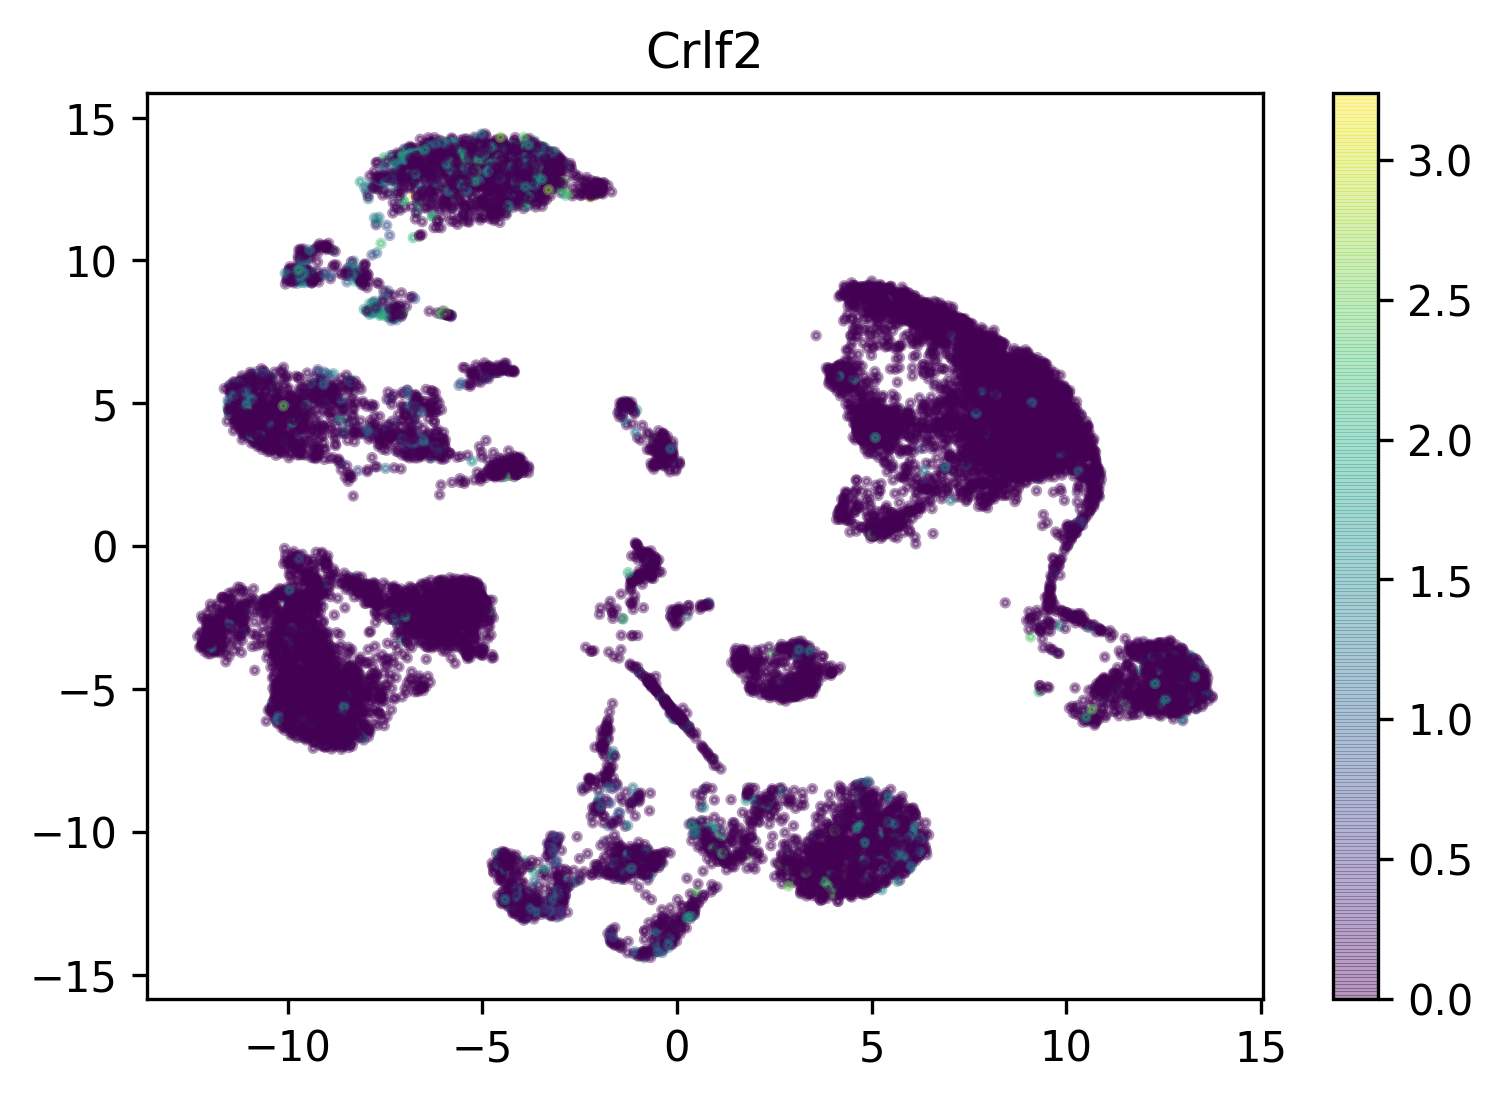

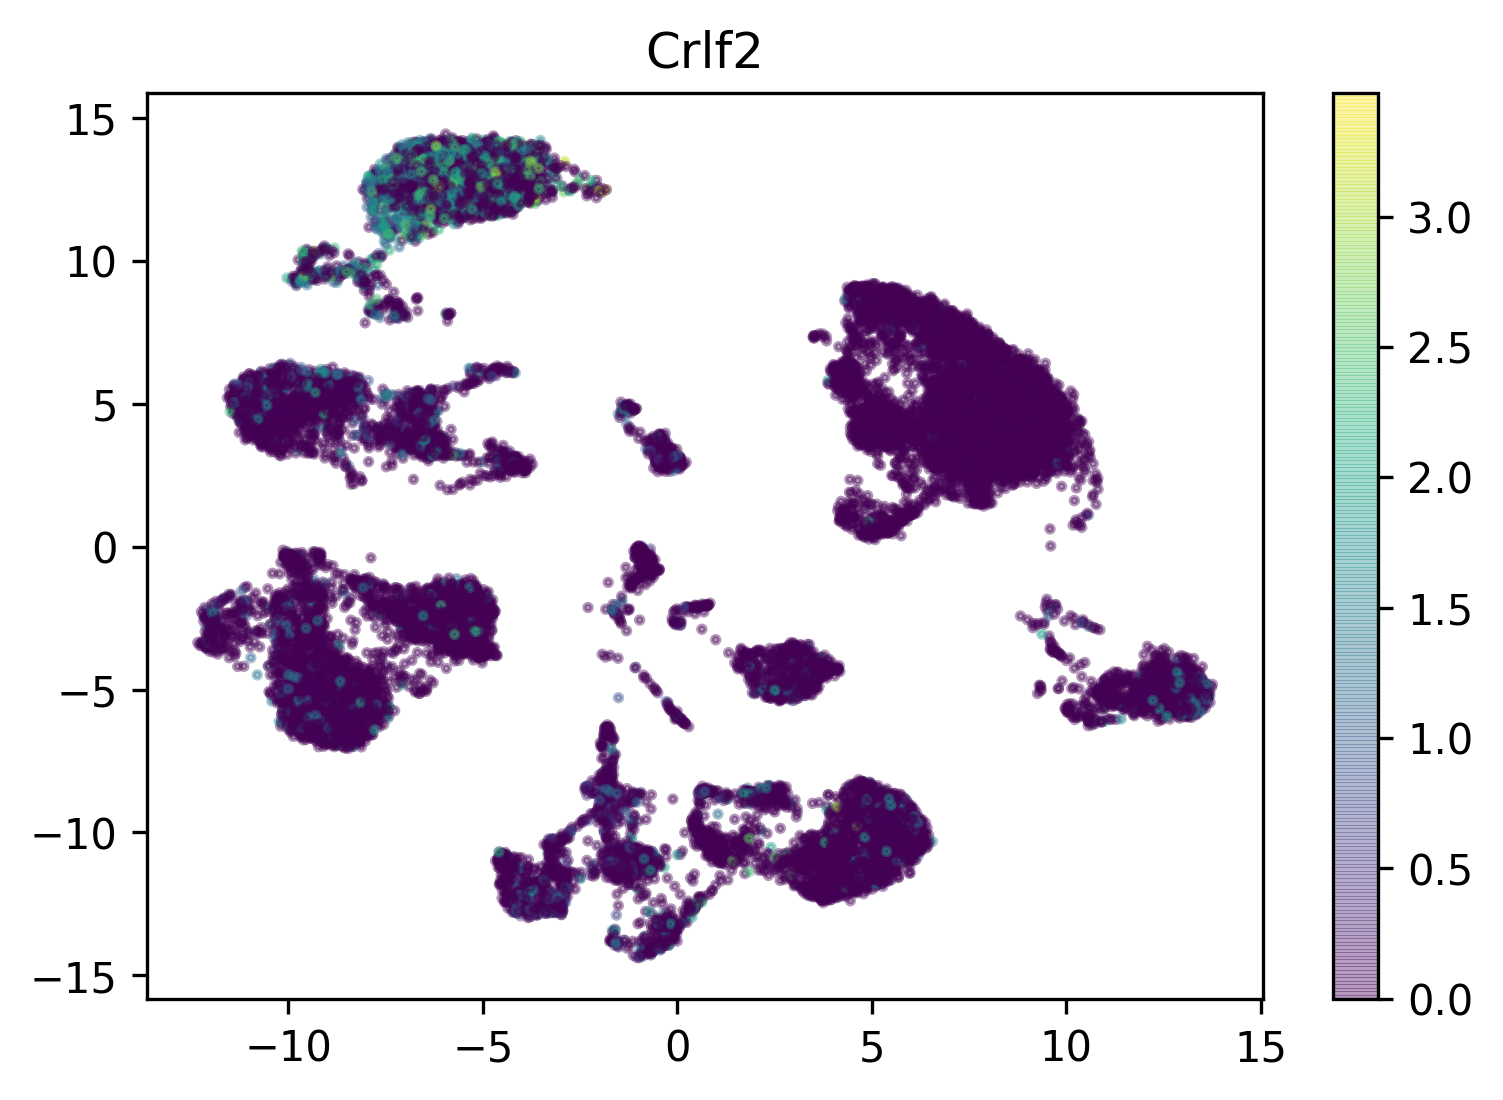

In [26]:

feature = "Crlf2"
f_i = forest.truth_dictionary.feature_dictionary[feature]

plt.figure()
plt.title(f'{feature}')
plt.scatter(*filtered.obsm["X_umap"][young_mask].T,c=forest.output[:,f_i],s=3,alpha=.4)
plt.colorbar()
plt.show()

plt.figure()
plt.title(f'{feature}')
plt.scatter(*filtered.obsm['X_umap'][old_mask].T,c=old.X[:,f_i],s=3,alpha=.4)
plt.colorbar()
plt.show()

# plt.figure()
# plt.title(f'{feature}')
# plt.scatter(*young.obsm["X_umap"].T,c=forest.output[:,f_i],s=3,alpha=.4)
# plt.colorbar()
# plt.show()

# plt.figure()
# plt.title(f'{feature}')
# plt.scatter(*old.obsm['X_umap'].T,c=old.X[:,f_i],s=3,alpha=.4)
# plt.colorbar()
# plt.show()

In [ ]:
feature = "Spock3"
f_i = forest.truth_dictionary.feature_dictionary[feature]

plt.figure()
plt.title(f'{feature}')
plt.scatter(*forest.tsne_coordinates.T,c=forest.output[:,f_i],s=3,alpha=.4)
plt.show()

plt.figure()
plt.title(f'{feature}')
plt.scatter(*old.obsm['X_umap'].T,c=old.X[:,f_i],s=3,alpha=.4)
plt.show()

In [ ]:
klk6_index = forest.truth_dictionary.feature_dictionary['Klk6']
klk6_correlations = np.corrcoef(forest.output.T)[klk6_index]
klk_sort = np.argsort(np.abs(klk6_correlations))
top_features = forest.output_features[klk_sort]

In [ ]:
print(top_features[-20:])

In [ ]:
mask1 = oligo_mask
mask2 = oligo_old_mask

f1 = "Opalin"
f2 = "Klk6"
f1i = forest.truth_dictionary.feature_dictionary[f1]
f2i = forest.truth_dictionary.feature_dictionary[f2]

noise11 = np.random.random(young.X.shape[0])/3
noise12 = np.random.random(young.X.shape[0])/3
noise21 = np.random.random(old.X.shape[0])/3
noise22 = np.random.random(old.X.shape[0])/3

plt.figure()
ax1 = plt.axes([0,0,.8,.8])
plt.scatter((young.X[:,f1i]+noise11)[mask1],(young.X[:,f2i]+noise12)[mask1],alpha=.5,s=2)
plt.plot()
ax2 = plt.axes([.8,0,.2,.8])
plt.hist((young.X[:,f2i]+noise11)[mask1],bins=20,orientation='horizontal')
ax3 = plt.axes([0,.8,.8,.2])
plt.hist((young.X[:,f1i]+noise12)[mask1],bins=20)
plt.show()

plt.figure()
ax1 = plt.axes([0,0,.8,.8])
plt.scatter((young.X[:,f1i]+noise11),(young.X[:,f2i]+noise12),alpha=.5,s=2)
plt.plot()
ax2 = plt.axes([.8,0,.2,.8])
plt.hist((young.X[:,f2i]+noise11),bins=20,orientation='horizontal')
ax3 = plt.axes([0,.8,.8,.2])
plt.hist((young.X[:,f1i]+noise12),bins=20)
plt.show()

# plt.figure()
# ax1 = plt.axes([0,0,.8,.8])
# plt.scatter((old.X[:,f1i]+noise21)[mask2],(old.X[:,f2i]+noise22)[mask2],alpha=.5,s=2)
# ax2 = plt.axes([.8,0,.2,.8])
# plt.hist((old.X[:,f2i]+noise21)[mask2],bins=20,orientation='horizontal')
# ax3 = plt.axes([0,.8,.8,.2])
# plt.hist((old.X[:,f1i]+noise22)[mask2],bins=20)
# plt.show()

In [ ]:
# https://link.springer.com/article/10.1007/s10048-016-0478-0
# Snca expression associated with amyloid-like inclusion bodies, proteostatic stress? 
# Klk6 association reverses from .09 young to -.08 old. Now inverse association locally? 
# Klk6 & Spock3 both protease involved

# Tubb3 Microtubule assembly, guidance of axons, maintenance
# Spock3 modulates metalloproteases (High correlation/significance?)

In [ ]:
prkj_mask = young_factors[:,1] > 0
prkj_old_mask = old_factors[:,1] > 0

ppia_index = forest.truth_dictionary.feature_dictionary["Pcp4"]

In [ ]:
prkj_local = young.X[prkj_mask]
prkj_old_local = old.X[prkj_old_mask]

prkj_local_correlations = np.corrcoef(prkj_local.T)[ppia_index]
prkj_local_correlations[~np.isfinite(prkj_local_correlations)] = 0.00000000001
prkj_local_sort = np.argsort(np.abs(prkj_local_correlations))
prkj_local_features = forest.output_features[prkj_local_sort][-20:]
print(prkj_local_features)
print(prkj_local_correlations[prkj_local_sort][-20:])

prkj_old_local_correlations = np.corrcoef(prkj_old_local.T)[ppia_index]
prkj_old_local_correlations[~np.isfinite(prkj_old_local_correlations)] = 0.00000000001
prkj_old_local_sort = np.argsort(np.abs(prkj_old_local_correlations))
prkj_old_local_features = forest.output_features[prkj_old_local_sort][-20:]
print(prkj_old_local_features)
print(prkj_old_local_correlations[prkj_old_local_sort][-20:])

In [ ]:
prkj_delta_correlations = prkj_local_correlations[:1999] - prkj_old_local_correlations
prkj_delta_correlations[~np.isfinite(prkj_delta_correlations)] = .0000000001
prkj_delta_sort = np.argsort(np.abs(prkj_delta_correlations))
prkj_delta_features = forest.output_features[prkj_delta_sort]

In [ ]:
print(prkj_delta_features[-20:])
print(prkj_delta_correlations[prkj_delta_sort][-20:])
print(prkj_local_correlations[prkj_delta_sort][-20:])
print(prkj_old_local_correlations[prkj_delta_sort][-20:])

# Go enrichment of the deltas was not obviously helpful

In [ ]:
print(prkj_local_correlations[snca_i])
print(prkj_old_local_correlations[snca_i])

In [ ]:
# Sgk1, Spock3, C4b, inflammation 